Some Kind of description here

## Import Statements

In [228]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pathlib import Path

## Data Exploration

In [229]:
file_path = Path('.') / 'data_files' / 'abortion.csv'
df = pd.read_csv(file_path)

In [230]:
df.head()

,tweet,date,likes,retweets,sentiment
0,“This new law serves to empower women with kno...,"Jan 1, 2021",264,65,positive
1,Was about to comment on this but...#AbortoLega...,"Jan 1, 2021",4,1,positive
2,You are human regardless of how people feel ab...,"Jan 1, 2021",5,3,positive
3,#Hello2021 Hello out there. In a quest to addr...,"Jan 1, 2021",2,3,negative
4,Happy New Year 2021! Lets liberate abortion pi...,"Jan 1, 2021",13,3,positive


In [231]:
df.tail()

,tweet,date,likes,retweets,sentiment
39760,Republicans Are Lying About #Abortion Because ...,"May 21, 2022",0,0,negative
39761,Devil Woman Pelosi has finally been banned by ...,"May 20, 2022",5,2,negative
39762,"""If Roe is overturned, abortion advocates are ...","May 20, 2022",0,0,negative
39763,Precaution/Prevention/Contraception IS a woman...,"May 20, 2022",0,1,negative
39764,"In this art short video, I look at the abortio...","May 21, 2022",0,0,negative


In [232]:
df.shape

(39765, 5)

In [233]:
df.count()

tweet        39765
date         39765
likes        39765
retweets     39765
sentiment    39765
dtype: int64

In [234]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)
df.groupby('date').count()

,tweet,likes,retweets,sentiment
date,,,,
2021-01-01,83,83,83,83
2021-01-02,71,71,71,71
2021-01-03,73,73,73,73
2021-01-04,77,77,77,77
2021-01-05,93,93,93,93
...,...,...,...,...
2022-05-17,255,255,255,255
2022-05-18,343,343,343,343
2022-05-19,369,369,369,369


In [235]:
# Get number of positive tweets for each date
pos = df[df['sentiment'] == 'positive']
pos['date']
pos_grouped = pos.groupby(['date', 'sentiment'], as_index=False).size() # as_index creates relevant columns in a DF
pos_grouped.rename({'size': 'positive_tweets'}, inplace=True, axis='columns')
pos_grouped.drop({'sentiment'}, axis='columns')

,date,positive_tweets
0,2021-01-01,40
1,2021-01-02,24
2,2021-01-03,23
3,2021-01-04,41
4,2021-01-05,42
...,...,...
501,2022-05-17,90
502,2022-05-18,136
503,2022-05-19,144
504,2022-05-20,108


In [236]:
# Get number of negative tweets for each date
neg = df[df['sentiment'] == 'negative']
neg['date']
neg_grouped = neg.groupby(['date', 'sentiment'], as_index=False).size() # as_index creates relevant columns in a DF
neg_grouped.rename({'size': 'negative_tweets'}, inplace=True, axis='columns')
neg_grouped.drop({'sentiment'}, axis='columns')

,date,negative_tweets
0,2021-01-01,43
1,2021-01-02,47
2,2021-01-03,50
3,2021-01-04,36
4,2021-01-05,51
...,...,...
501,2022-05-17,165
502,2022-05-18,207
503,2022-05-19,225
504,2022-05-20,178


In [237]:
# Create new DataFrame with date, positive_tweets, and negative_tweets
new_df = pos_grouped[['date', 'positive_tweets']]
new_df['negative_tweets'] = neg_grouped['negative_tweets']
new_df['total_tweets'] = new_df['positive_tweets'] + new_df['negative_tweets']
new_df

,date,positive_tweets,negative_tweets,total_tweets
0,2021-01-01,40,43,83
1,2021-01-02,24,47,71
2,2021-01-03,23,50,73
3,2021-01-04,41,36,77
4,2021-01-05,42,51,93
...,...,...,...,...
501,2022-05-17,90,165,255
502,2022-05-18,136,207,343
503,2022-05-19,144,225,369
504,2022-05-20,108,178,286


In [238]:
# Determine percentages for pos/neg tweets on each date
percentage_df = new_df.copy()
percentage_df['positive_tweets'] = round(percentage_df['positive_tweets'] / percentage_df['total_tweets'], 2)
percentage_df.rename({'positive_tweets': 'pos_percentage'}, axis='columns', inplace=True)
percentage_df['negative_tweets'] = round(percentage_df['negative_tweets'] / percentage_df['total_tweets'], 2)
percentage_df.rename({'negative_tweets': 'neg_percentage'}, axis='columns', inplace=True)
percentage_df

,date,pos_percentage,neg_percentage,total_tweets
0,2021-01-01,0.48,0.52,83
1,2021-01-02,0.34,0.66,71
2,2021-01-03,0.32,0.68,73
3,2021-01-04,0.53,0.47,77
4,2021-01-05,0.45,0.55,93
...,...,...,...,...
501,2022-05-17,0.35,0.65,255
502,2022-05-18,0.40,0.60,343
503,2022-05-19,0.39,0.61,369
504,2022-05-20,0.38,0.62,286


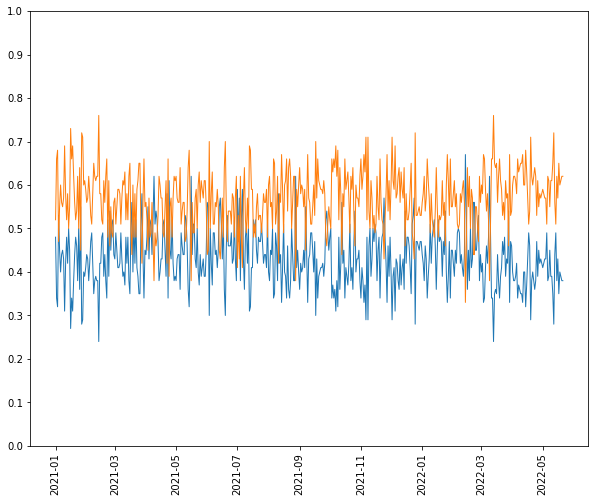

In [239]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.plot(percentage_df['date'], percentage_df['pos_percentage'], linewidth=1)
plt.plot(percentage_df['date'], percentage_df['neg_percentage'], linewidth=1)

In [240]:
# Get day, month, year data from 'date'
percentage_df['day'] = pd.DatetimeIndex(percentage_df['date']).day
percentage_df['month'] = percentage_df['date'].dt.month_name()
percentage_df['year'] = pd.DatetimeIndex(percentage_df['date']).year
percentage_df.reindex(columns=['date', 'month', 'day', 'year', 'pos_percentage', 'neg_percentage', 'total_tweets'])

,date,month,day,year,pos_percentage,neg_percentage,total_tweets
0,2021-01-01,January,1,2021,0.48,0.52,83
1,2021-01-02,January,2,2021,0.34,0.66,71
2,2021-01-03,January,3,2021,0.32,0.68,73
3,2021-01-04,January,4,2021,0.53,0.47,77
4,2021-01-05,January,5,2021,0.45,0.55,93
...,...,...,...,...,...,...,...
501,2022-05-17,May,17,2022,0.35,0.65,255
502,2022-05-18,May,18,2022,0.40,0.60,343
503,2022-05-19,May,19,2022,0.39,0.61,369
504,2022-05-20,May,20,2022,0.38,0.62,286


In [241]:
# Zoom in an a particular month
percentage_df_april2022 = percentage_df.loc[(percentage_df['month'] == 'April') & (percentage_df['year'] == 2022)]
percentage_df_april2022

,date,pos_percentage,neg_percentage,total_tweets,day,month,year
455,2022-04-01,0.40,0.60,91,1,April,2022
456,2022-04-02,0.38,0.62,64,2,April,2022
457,2022-04-03,0.38,0.62,65,3,April,2022
458,2022-04-04,0.39,0.61,88,4,April,2022
459,2022-04-05,0.42,0.58,99,5,April,2022
460,2022-04-06,0.34,0.66,100,6,April,2022
461,2022-04-07,0.37,0.63,83,7,April,2022
462,2022-04-08,0.36,0.64,95,8,April,2022
463,2022-04-09,0.35,0.65,92,9,April,2022
464,2022-04-10,0.35,0.65,82,10,April,2022


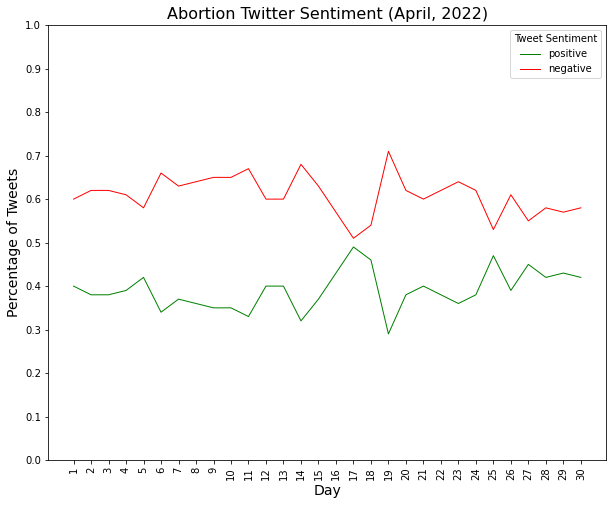

In [312]:
# Plot month's data
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.xticks(range(1, percentage_df_april2022['day'].iloc[-1] + 1, 1))
plt.xlabel('Day', size=14)
plt.ylabel('Percentage of Tweets', size=14)
plt.title('Abortion Twitter Sentiment (April, 2022)', size=16)
plt.plot(percentage_df_april2022['day'], percentage_df_april2022['pos_percentage'], linewidth=1, label='positive', color='green')
plt.plot(percentage_df_april2022['day'], percentage_df_april2022['neg_percentage'], linewidth=1, label='negative', color='red')
plt.legend(title='Tweet Sentiment')

In [287]:
# Now, let's zoom out to consider a whole year at once
df_2021 = new_df.copy()
df_2021['day'] = pd.DatetimeIndex(df_2021['date']).day
df_2021['month'] = df_2021['date'].dt.month_name()
df_2021['year'] = pd.DatetimeIndex(df_2021['date']).year
df_2021 = df_2021.loc[(df_2021['year'] == 2021)]
df_2021.reindex(columns=['date', 'month', 'day', 'year', 'positive_tweets', 'negative_tweets', 'total_tweets'])
df_2021 = df_2021.groupby(['month'], as_index=False).sum()
df_2021

,month,positive_tweets,negative_tweets,total_tweets,day,year
0,April,873,990,1863,465,60630
1,August,789,1071,1860,496,62651
2,December,1036,1419,2455,496,62651
3,February,868,1159,2027,406,56588
4,January,1003,1445,2448,496,62651
5,July,941,1110,2051,496,62651
6,June,968,1144,2112,465,60630
7,March,972,1265,2237,496,62651
8,May,967,1253,2220,496,62651
9,November,947,1279,2226,465,60630


In [288]:
# Sort by month for easier reading and drop unnecessary columns
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_2021['month'] = pd.Categorical(df_2021['month'], categories=months_order, ordered=True)
df_2021.sort_values(by='month', inplace=True)
df_2021.drop({'day', 'year'}, axis='columns', inplace=True)
df_2021

,month,positive_tweets,negative_tweets,total_tweets
4,January,1003,1445,2448
3,February,868,1159,2027
7,March,972,1265,2237
0,April,873,990,1863
8,May,967,1253,2220
6,June,968,1144,2112
5,July,941,1110,2051
1,August,789,1071,1860
11,September,1120,1495,2615
10,October,1066,1501,2567


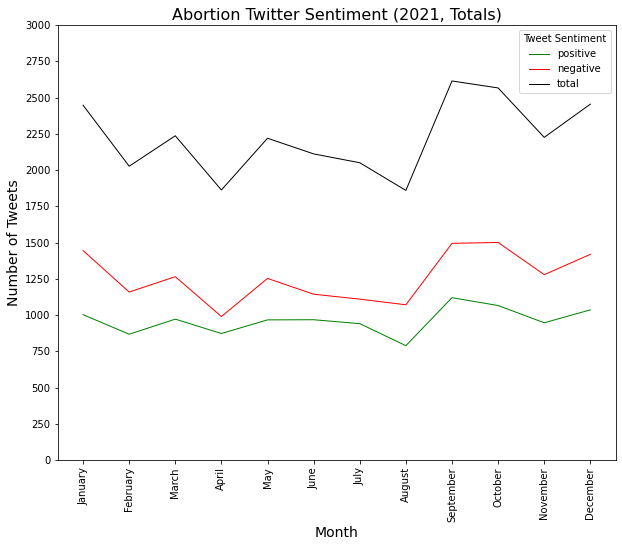

In [310]:
# Plot year's data (in terms of total tweets)
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 3000)
plt.yticks(range(0, 3250, 250))
plt.xticks(range(0, 12, 1))
plt.xlabel('Month', size=14)
plt.ylabel('Number of Tweets', size=14)
plt.title('Abortion Twitter Sentiment (2021, Totals)', size=16)
plt.plot(df_2021['month'], df_2021['positive_tweets'], linewidth=1, label='positive', color='green')
plt.plot(df_2021['month'], df_2021['negative_tweets'], linewidth=1, label='negative', color='red')

plt.plot(df_2021['month'], df_2021['total_tweets'], linewidth=1, label='total', color='black')

plt.legend(title='Tweet Sentiment')

In [282]:
# Get percentages as before
df_2021_percentages = df_2021.copy()
df_2021_percentages['positive_tweets'] = round(df_2021_percentages['positive_tweets'] / df_2021_percentages['total_tweets'], 2)
df_2021_percentages.rename({'positive_tweets': 'pos_percentage'}, axis='columns', inplace=True)
df_2021_percentages['negative_tweets'] = round(df_2021_percentages['negative_tweets'] / df_2021_percentages['total_tweets'], 2)
df_2021_percentages.rename({'negative_tweets': 'neg_percentage'}, axis='columns', inplace=True)
df_2021_percentages

,month,pos_percentage,neg_percentage,total_tweets
4,January,0.41,0.59,2448
3,February,0.43,0.57,2027
7,March,0.43,0.57,2237
0,April,0.47,0.53,1863
8,May,0.44,0.56,2220
6,June,0.46,0.54,2112
5,July,0.46,0.54,2051
1,August,0.42,0.58,1860
11,September,0.43,0.57,2615
10,October,0.42,0.58,2567


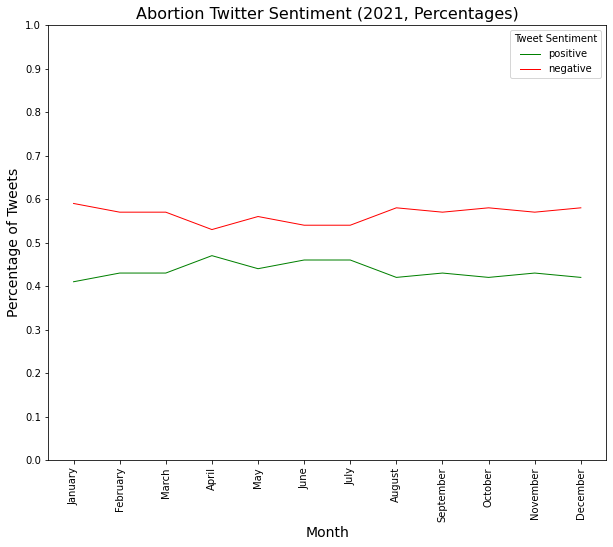

In [311]:
# Plot year's data (in terms of percentages)
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.xticks(range(0, 12, 1))
plt.xlabel('Month', size=14)
plt.ylabel('Percentage of Tweets', size=14)
plt.title('Abortion Twitter Sentiment (2021, Percentages)', size=16)
plt.plot(df_2021_percentages['month'], df_2021_percentages['pos_percentage'], linewidth=1, label='positive', color='green')
plt.plot(df_2021_percentages['month'], df_2021_percentages['neg_percentage'], linewidth=1, label='negative', color='red')

# axis2 = plt.gca().twinx()
# axis2.plot(df_2021_percentages['month'], df_2021_percentages['total_tweets'], linewidth=1, label='total')

plt.legend(title='Tweet Sentiment')

In [ ]:
# TODO: Consider likes and retweets for weighted sentiment analysis